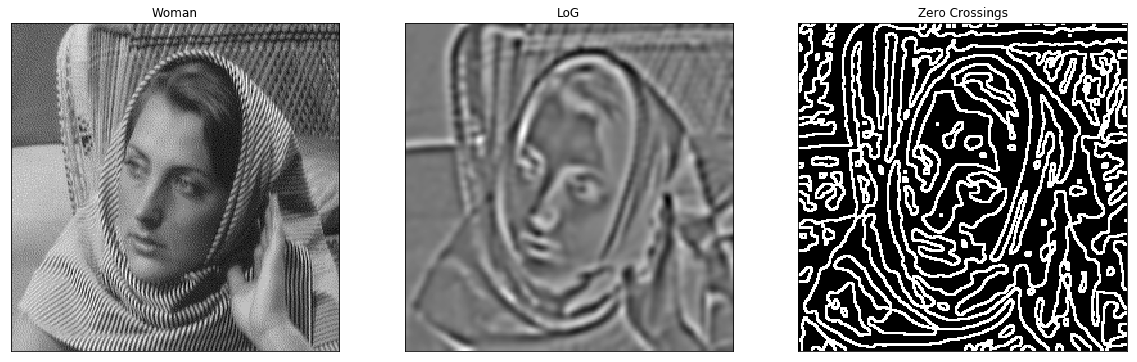

In [36]:
##############################
# ASSIGNMENT 1: Question 2.2 #
##############################

#2.2 Laplacian of Gaussian
import numpy as np
import cv2
import matplotlib.pyplot as plt

woman = cv2.imread("./woman.png", cv2.IMREAD_GRAYSCALE)

#gaussian blur on the original image
gaussBlur = cv2.GaussianBlur(woman, (5,5), np.sqrt(2))

#laplacian of gaussina on the blurred image
laplacian = cv2.Laplacian(gaussBlur, cv2.CV_64F, ksize=31)

#find zero crossing
minMap = cv2.morphologyEx(laplacian, cv2.MORPH_ERODE, np.ones((0,0)))
maxMap = cv2.morphologyEx(laplacian, cv2.MORPH_DILATE, np.ones((0,0)))
zeroCrossigs = np.logical_or(np.logical_and(minMap < 0, laplacian > 0), np.logical_and(maxMap > 0, laplacian < 0))

#plot 
plt.figure(figsize=(20, 20)) 
plt.subplot(131), plt.imshow(woman, cmap="gray")
plt.title("Woman"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(laplacian, cmap="gray")
plt.title("LoG"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(zeroCrossigs, cmap="gray")
plt.title("Zero Crossings"), plt.xticks([]), plt.yticks([])
plt.show()